In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, Model
from tensorflow.keras import activations
from tensorflow.keras import backend as bk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Input, BatchNormalization, ConvLSTM3D, Conv3D, Masking, SpatialDropout3D, Bidirectional
from tensorflow.keras.activations import relu, sigmoid
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.python.keras.layers.core import SpatialDropout2D
import cmocean.cm as cmo


import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn import metrics


import bp3d
import os
import sys
import s3fs
import zarr
import numpy as np
import pandas as pd

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


data_dir = '../../DATA'
save_dir = '../../DATA'
file = os.path.join(data_dir, 'indices.txt')

f=open(file,"r")
lines=f.readlines()
samples=[]
for x in lines:
    samples.append(x.split(' ')[0])
f.close()

in_frames = 50

ip = ["Aerial", "Outward", "Strip South", "Inward", "Strip North"]

datasets = []
ys = []
test_datasets, test_ys = [], []
for i in range(len(samples)):
    if i <int(len(samples)/2):
        datasets.append(
            np.load(os.path.join(
            data_dir, 'train-features-'+str(samples[i])+'.npy'
            ))
        )
        ys.append(
                    np.load(os.path.join(
            data_dir, 'train-y-'+str(samples[i])+'.npy'
            ))

        )
    else:
        test_datasets.append(
                    np.load(os.path.join(
            data_dir, 'test-features-'+str(samples[i])+'.npy'
            ))

        )
        test_ys.append(
                            np.load(os.path.join(
            data_dir, 'test-y-'+str(samples[i])+'.npy'
            ))

        )

2023-06-27 20:52:09.946453: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-27 20:52:09.946491: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:

x_train = test_datasets[0]
def build_model():
    inp = layers.Input(shape=(None, *x_train.shape[2:]))
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(10, 10),
        padding="same",
        return_sequences=True,
        activation="relu",
    )(inp)
    x = layers.BatchNormalization()(x)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(3, 3),
        padding="same",
        return_sequences=True,
        activation="relu",
    )(x)
    x = layers.BatchNormalization()(x)
    x = layers.ConvLSTM2D(
        filters=64,
        kernel_size=(1, 1),
        padding="same",
        return_sequences=True,
        activation="relu",
    )(x)
    x = layers.Conv3D(
        filters=1, kernel_size=(3, 3, 3), activation="relu", padding="same"
    )(x)

    model = keras.models.Model(inp, x)
    model0 = model
    return model0



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


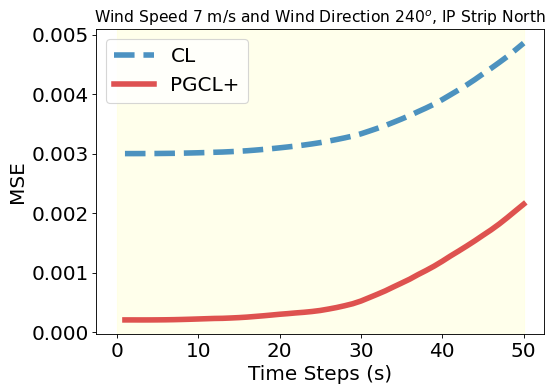

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


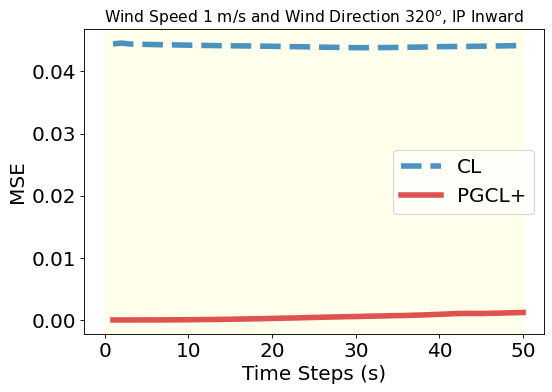

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


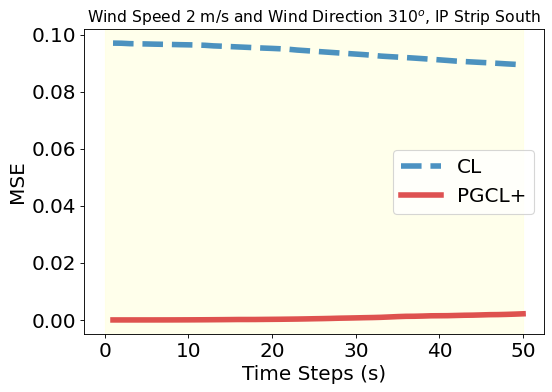

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


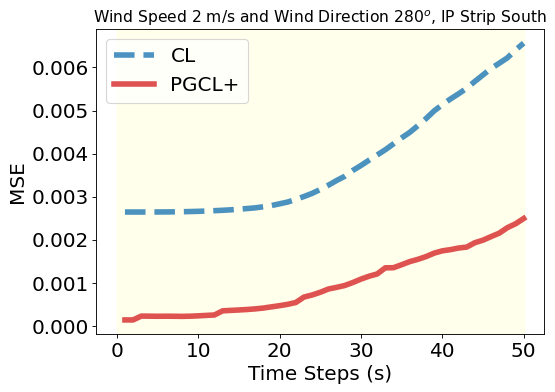

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


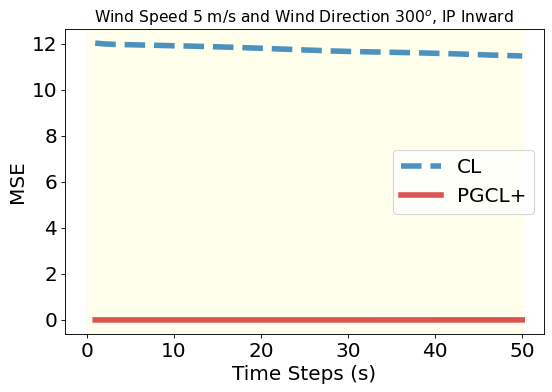

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


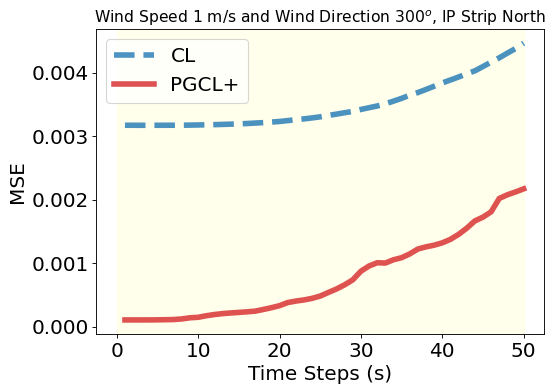

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


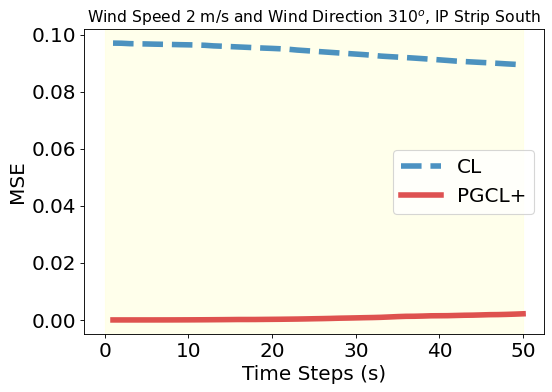

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


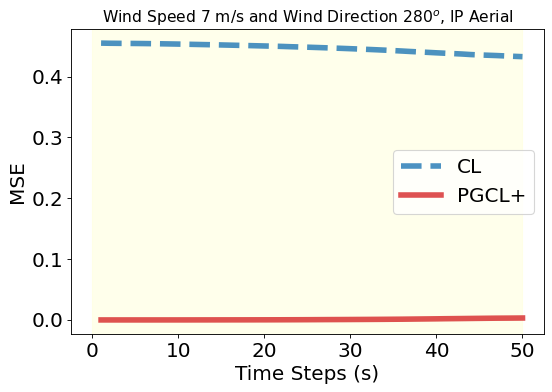

In [108]:
indices = [10, 34,38, 1, 5, 15, 38, 26]
# Figure 5: MSE
wind_cond = [[round(test_datasets[i][0,0,0,0,1]*100+230),round(test_datasets[i][0,0,0,0,2]*14+1), ip[np.asarray(samples).astype('int')[(50+i)]%5]] for i in indices]
mycolors = ['tab:red', 'tab:blue']    
# indices= [10, 34]

for j,i in enumerate(indices):
    msepred = np.load('mseonly/pred-{}.npy'.format(str(i)))
    allpred = np.load('alllosses/pred-{}.npy'.format(str(i)))
    msemse = np.mean((msepred-test_ys[i])**2, axis=(1,2,3,4))
    allmse = np.mean((allpred-test_ys[i])**2, axis=(1,2,3,4))
    
    fig, ax = plt.subplots(1, 1, figsize=(7,5), dpi= 80)
    ax.axvspan(0, 50, alpha=0.5, color=lighten_color('yellow',0.15))
    ax.plot(np.arange(1,51), msemse,  label='CL', alpha=0.8, color=mycolors[1], linewidth=5,linestyle='--')
    ax.plot(np.arange(1,51), allmse,  label='PGCL+', alpha=0.8, color=mycolors[0], linewidth=5)

    plt.xlabel('Time Steps (s)', fontsize=18)
    plt.ylabel('MSE', fontsize=18)
    plt.title("Wind Speed {} m/s and Wind Direction {}$^o$, IP {}".format(wind_cond[j][1], wind_cond[j][0],  wind_cond[j][2]), fontsize=14)
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    plt.legend(loc='best', fontsize=18)
    plt.tight_layout()
    plt.savefig('icdm/figure5/pred-{}.eps'.format(str(i)))
    plt.savefig('icdm/figure5/pred-{}.png'.format(str(i)))
    plt.show()

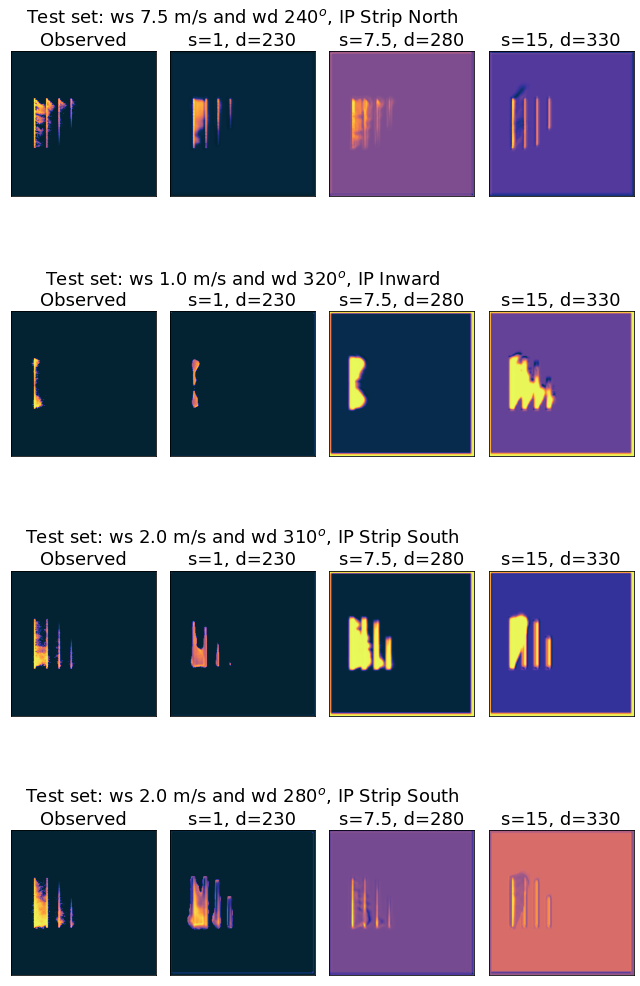

In [16]:
# figure appendix: extrapolate wind speed
indices = [10, 34,38, 1]
wind_cond = [[round(test_datasets[i][0,0,0,0,1]*100+230),round(test_datasets[i][0,0,0,0,2]*14+1,1), ip[np.asarray(samples).astype('int')[(50+i)]%5]] for i in indices]

import cmocean.cm as cmo
fig,axes = plt.subplots(ncols=4, nrows=len(indices), figsize=(9,15))
labels = ["ws {} m/s and wd {}$^o$, IP {}".format(wind_cond[j][1], wind_cond[j][0],  wind_cond[j][2]) for j,i in enumerate(indices)]
for i in indices:
    axes[indices.index(i),0].imshow(test_ys[i][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),0].set_title('Observed', fontsize=18)
    axes[indices.index(i),0].set_xticks([])
    axes[indices.index(i),0].set_yticks([])

    pred = np.load('alllosses/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),1].imshow(pred[49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),1].set_title('Test set: '+labels[indices.index(i)]+'\ns=1, d=230', fontsize=18)
    axes[indices.index(i),1].set_xticks([])
    axes[indices.index(i),1].set_yticks([])

    pred = np.load('ws7-5/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),2].imshow(pred[49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),2].set_title('s=7.5, d=280', fontsize=18)
    axes[indices.index(i),2].set_xticks([])
    axes[indices.index(i),2].set_yticks([])

    pred = np.load('ws15/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),3].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),3].set_title('s=15, d=330', fontsize=18)
    axes[indices.index(i),3].set_xticks([])
    axes[indices.index(i),3].set_yticks([])

    
plt.margins(0)    
plt.tight_layout()
plt.savefig('icdm/rm.eps')
plt.savefig('icdm/rm.png')

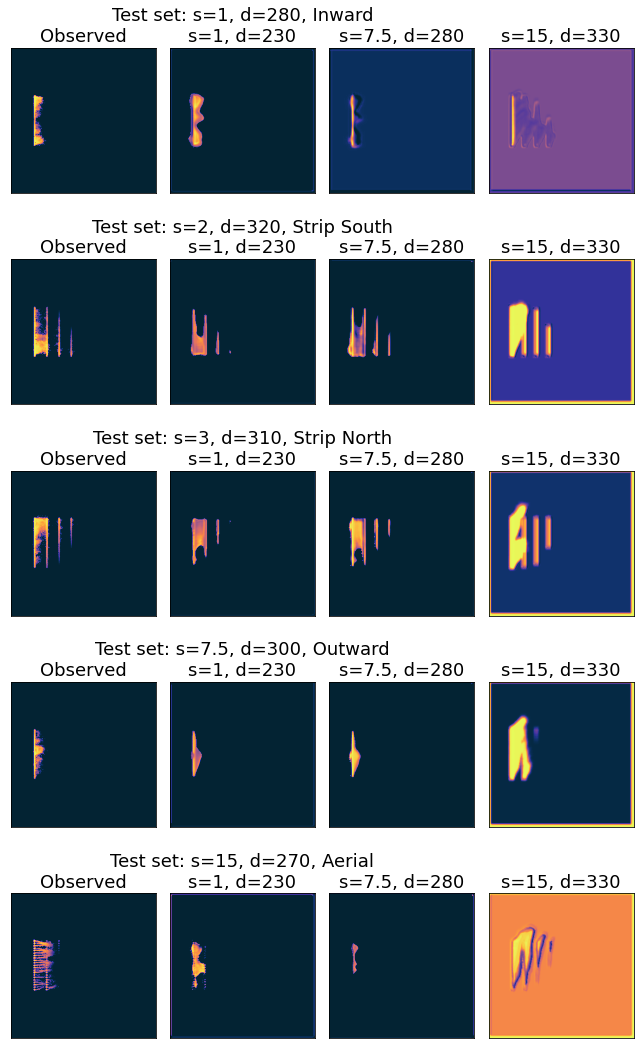

In [37]:
# figure appendix: extrapolate wind speed
indices = [17, 38, 43, 27, 44]
import cmocean.cm as cmo
fig,axes = plt.subplots(ncols=4, nrows=len(indices), figsize=(9,15))
labels = ['s=1, d=280, Inward', 's=2, d=320, Strip South', 's=3, d=310, Strip North', 's=7.5, d=300, Outward', 's=15, d=270, Aerial']
for i in indices:
    axes[indices.index(i),0].imshow(test_ys[i][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),0].set_title('Observed', fontsize=18)
    axes[indices.index(i),0].set_xticks([])
    axes[indices.index(i),0].set_yticks([])

    pred = np.load('alllosses/pred-{}.npy'.format(str(i)))

    axes[indices.index(i),1].imshow(pred[49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),1].set_title('Test set: '+labels[indices.index(i)]+'\ns=1, d=230', fontsize=18)
    axes[indices.index(i),1].set_xticks([])
    axes[indices.index(i),1].set_yticks([])

    pred = np.load('ws7-5/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),2].imshow(pred[49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),2].set_title('s=7.5, d=280', fontsize=18)
    axes[indices.index(i),2].set_xticks([])
    axes[indices.index(i),2].set_yticks([])

    pred = np.load('ws15/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),3].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),3].set_title('s=15, d=330', fontsize=18)
    axes[indices.index(i),3].set_xticks([])
    axes[indices.index(i),3].set_yticks([])

    
plt.margins(0)    
plt.tight_layout()
plt.savefig('wind/ws.eps')
plt.savefig('wind/ws.png')

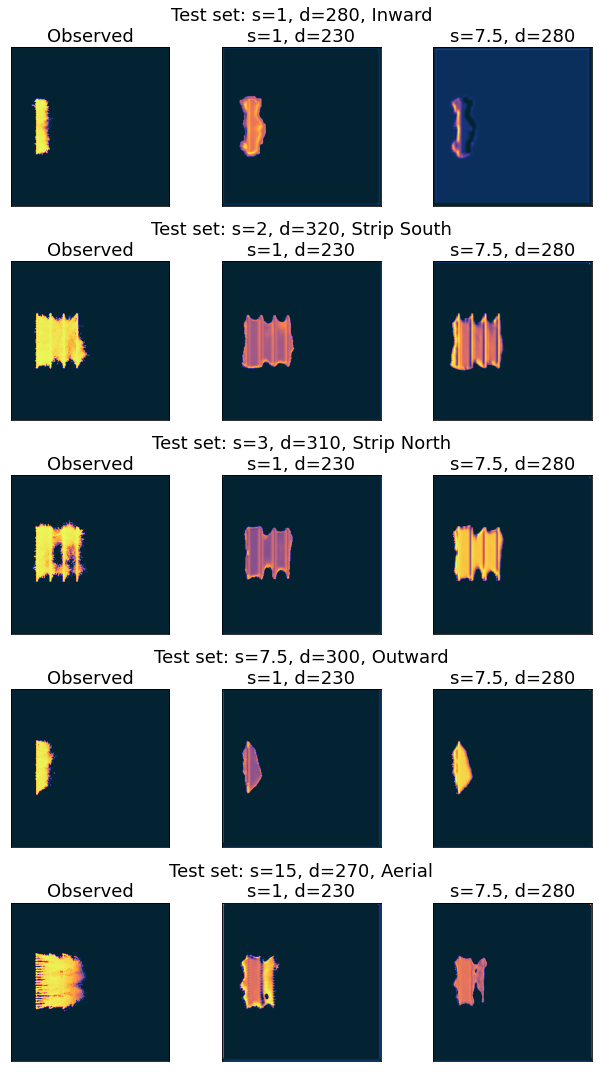

In [11]:
# figure appendix: extrapolate wind speed


    
# figure appendix: extrapolate wind speed
indices = [17, 38, 43, 27, 44]
import cmocean.cm as cmo
fig,axes = plt.subplots(ncols=3, nrows=len(indices), figsize=(9,15))
labels = ['s=1, d=280, Inward', 's=2, d=320, Strip South', 's=3, d=310, Strip North', 's=7.5, d=300, Outward', 's=15, d=270, Aerial']
for i in indices:
    axes[indices.index(i),0].imshow(test_ys[i][-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),0].set_title('Observed', fontsize=18)
    axes[indices.index(i),0].set_xticks([])
    axes[indices.index(i),0].set_yticks([])

    pred = np.load('alllosses/pred-{}.npy'.format(str(i)))

    axes[indices.index(i),1].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),1].set_title('Test set: '+labels[indices.index(i)]+'\ns=1, d=230', fontsize=18)
    axes[indices.index(i),1].set_xticks([])
    axes[indices.index(i),1].set_yticks([])

    pred = np.load('ws7-5/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),2].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),2].set_title('s=7.5, d=280', fontsize=18)
    axes[indices.index(i),2].set_xticks([])
    axes[indices.index(i),2].set_yticks([])



    
plt.margins(0)    
plt.tight_layout()
plt.savefig('extrapolate/ws.eps')
plt.savefig('extrapolate/ws.png')

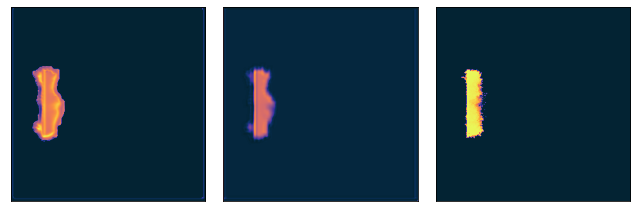

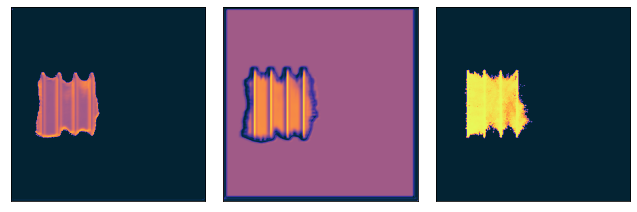

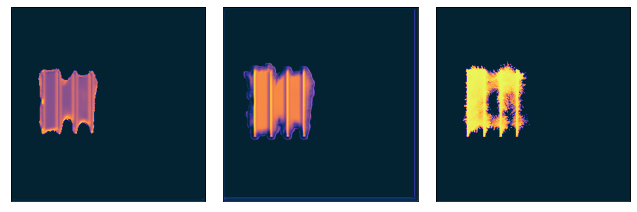

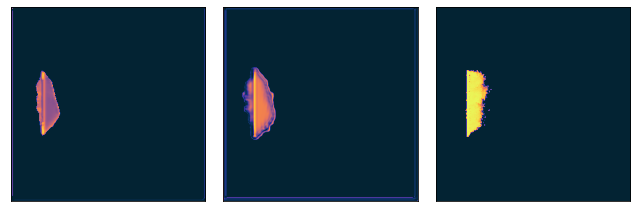

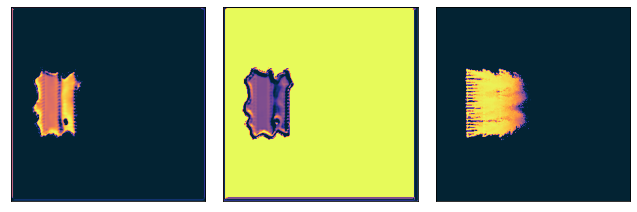

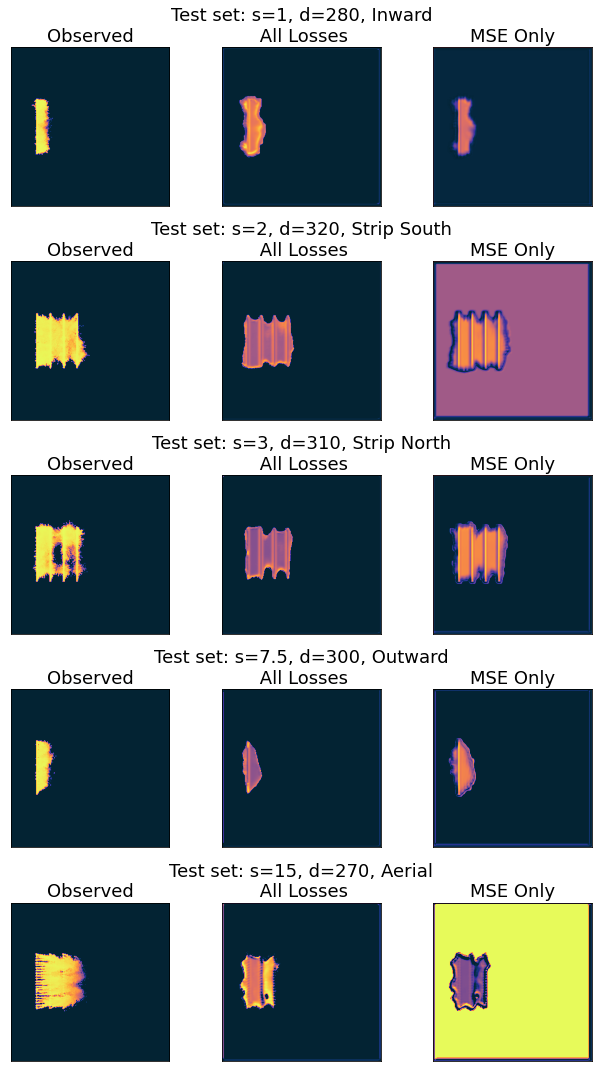

In [10]:
# figre: extrapolate for individuals

import cmocean.cm as cmo

    
# figure appendix: extrapolate wind speed
indices = [17, 38, 43, 27, 44]
import cmocean.cm as cmo
fig,axes = plt.subplots(ncols=3, nrows=len(indices), figsize=(9,15))
labels = ['s=1, d=280, Inward', 's=2, d=320, Strip South', 's=3, d=310, Strip North', 's=7.5, d=300, Outward', 's=15, d=270, Aerial']
for i in indices:
    axes[indices.index(i),0].imshow(test_ys[i][-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),0].set_title('Observed', fontsize=18)
    axes[indices.index(i),0].set_xticks([])
    axes[indices.index(i),0].set_yticks([])

    pred = np.load('alllosses/pred-{}.npy'.format(str(i)))

    axes[indices.index(i),1].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),1].set_title('Test set: '+labels[indices.index(i)]+'\n All Losses', fontsize=18)
    axes[indices.index(i),1].set_xticks([])
    axes[indices.index(i),1].set_yticks([])

    pred = np.load('mseonly/pred-{}.npy'.format(str(i)))
    axes[indices.index(i),2].imshow(pred[-1,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
    axes[indices.index(i),2].set_title('MSE Only', fontsize=18)
    axes[indices.index(i),2].set_xticks([])
    axes[indices.index(i),2].set_yticks([])



    
plt.margins(0)    
plt.tight_layout()
plt.savefig('extrapolate/pred.eps')
plt.savefig('extrapolate/pred.png')

In [4]:
# Wind speed
all_mses=[]
mse_mses=[]
for i in range(50):
    pred = np.load('alllosses/pred-{}.npy'.format(str(i)))

    all_mses.append(
    np.mean( (test_ys[i][:50] - pred)**2  )
    )
    pred = np.load('mseonly/pred-{}.npy'.format(str(i)))

    
    mse_mses.append(
    np.mean( (test_ys[i][:50] - pred)**2  )
    )
    
ws, wd = np.asarray([ i[0,0,0,0,2] for i in test_datasets ]), np.asarray([ i[0,0,0,0,1] for i in test_datasets ])

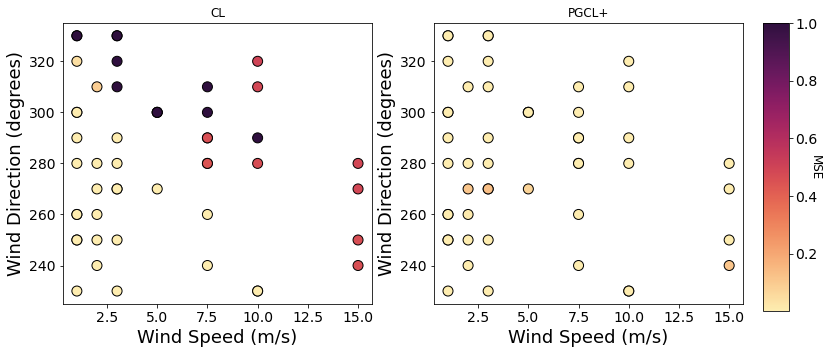

In [10]:
fig,axes = plt.subplots(figsize=(14,5), ncols=2)
f=axes[0].scatter(ws*14+1, wd*100+230, c=np.asarray(mse_mses), cmap=cmo.matter, vmax=1.00, edgecolors='k', s=100, label="CL")
axes[0].set_xlabel('Wind Speed (m/s)', fontsize=18)
axes[0].xaxis.set_tick_params( labelsize=14)
axes[0].yaxis.set_tick_params( labelsize=14)
axes[0].set_ylabel('Wind Direction (degrees)', fontsize=18)

f=axes[1].scatter(ws*14+1, wd*100+230, c=np.asarray(all_mses), cmap=cmo.matter, vmax=1.00, edgecolors='k', s=100, label="PGCL+")
axes[1].set_xlabel('Wind Speed (m/s)', fontsize=18)
axes[1].xaxis.set_tick_params( labelsize=14)
axes[1].yaxis.set_tick_params( labelsize=14)

axes[1].set_ylabel('Wind Direction (degrees)', fontsize=18)
plt.subplots_adjust(bottom=0.12, right=0.8, top=0.9)
cax = plt.axes([0.82, 0.1, 0.025, 0.8])
cbar= plt.colorbar(f,cax=cax)
cbar.ax.set_ylabel('MSE', rotation=270, fontsize=12)
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(14)


axes[0].set_title( "CL")

axes[1].set_title( "PGCL+")
# plt.tight_layout()
plt.savefig('icdm/mse_msebywind.png')

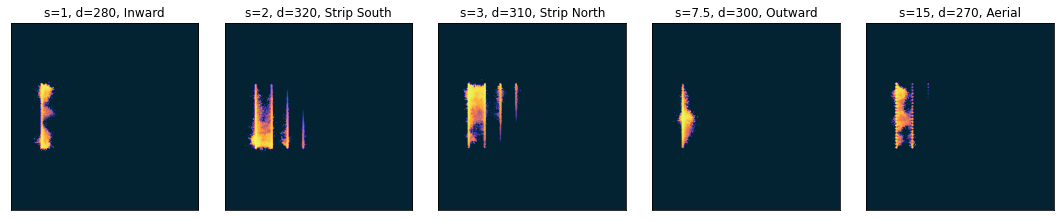

In [8]:
indices = [17, 38, 43, 27, 44]
labels = ['s=1, d=280, Inward', 's=2, d=320, Strip South', 's=3, d=310, Strip North', 's=7.5, d=300, Outward', 's=15, d=270, Aerial']

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(15,3))
axes[0].imshow(test_datasets[indices[0]][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
axes[0].set_title(labels[0])
axes[0].set_xticks([])
axes[0].set_yticks([])


axes[1].imshow(test_datasets[indices[1]][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
axes[1].set_title(labels[1])
axes[1].set_xticks([])
axes[1].set_yticks([])


axes[2].imshow(test_datasets[indices[2]][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
axes[2].set_title(labels[2])
axes[2].set_xticks([])
axes[2].set_yticks([])



axes[3].imshow(test_datasets[indices[3]][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
axes[3].set_title(labels[3])
axes[3].set_xticks([])
axes[3].set_yticks([])


axes[4].imshow(test_datasets[indices[4]][49,:,:,:,0].squeeze(), cmap=cmo.thermal_r)
axes[4].set_title(labels[4])
axes[4].set_xticks([])
axes[4].set_yticks([])

plt.margins(0)
plt.tight_layout()
plt.savefig('refdata.png')
plt.savefig('refdata.eps')

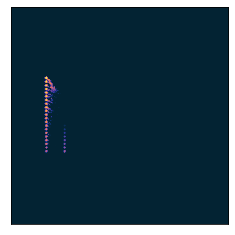

In [86]:
plt.imshow(test_datasets[0][50,:,:,:,-1].squeeze(), cmap=cmo.thermal_r)
plt.xticks([])
plt.yticks([])
plt.savefig('ignite_49.eps')
plt.savefig('ignite_49.png')

plt.imshow(test_datasets[0][30,:,:,:,-1].squeeze(), cmap=cmo.thermal_r)
plt.xticks([])
plt.yticks([])
plt.savefig('ignite_30.eps')
plt.savefig('ignite_30.png')

plt.imshow(test_ys[0][50,:,:,:,-1].squeeze(), cmap=cmo.thermal_r)
plt.xticks([])
plt.yticks([])
plt.savefig('y_49.eps')
plt.savefig('y_49.png')

plt.imshow(test_ys[0][30,:,:,:,-1].squeeze(), cmap=cmo.thermal_r)
plt.xticks([])
plt.yticks([])
plt.savefig('y_30.eps')
plt.savefig('y_30.png')

In [3]:
import seaborn as sns

def errplot(x, y, yerr, hue, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    print(hue)
    data.plot(x=x, y=y, yerr=yerr, color=hue, kind="bar", ax=ax, **kwargs)

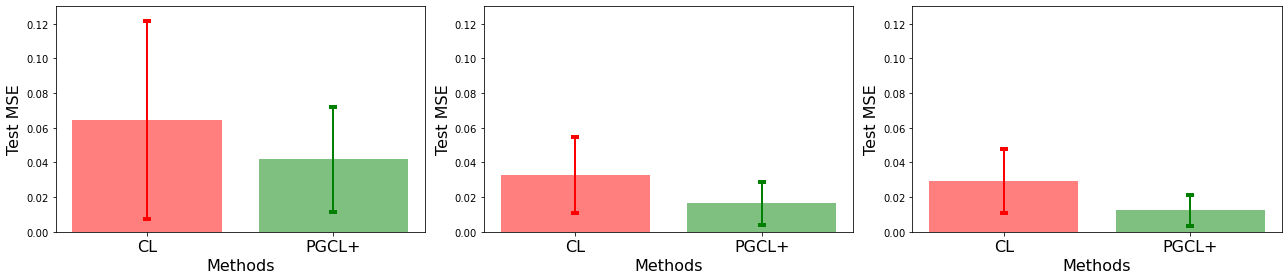

In [17]:
# data scarcity
clscore = [0.0644, 0.0329, 0.0293]
clsstd = [0.057, 0.0219, 0.0184]
pgclscore = [0.0417, 0.0164, 0.0123]
pgclstd = [0.0303, 0.0122, 0.0092]
percentages = ["20%", "50%", "100%"]
scores = pd.DataFrame({"Method": ["CL"]*3+["PGCL+"]*3, "MSE": clscore+pgclscore, "Percentage":percentages*2, "SD": clsstd+pgclstd})
colors_list = ['red']*3+[ 'green']*3
fig, axes = plt.subplots(ncols=3, figsize=(18,4))
 


for j, ax in enumerate(axes):
    
    indices =np.array((scores["Percentage"]==percentages[j]).values)
    
    colors= ['red']+[ 'green']
    x, marks, error = scores.loc[indices, "Method"], scores.loc[indices, "MSE"], scores.loc[indices, "SD"]
    ax.bar(x, marks, alpha = 0.5,
           color = colors)

    for pos, y, err, colorval in zip(range(0,2), marks,
                                   error, colors):
        
        ax.errorbar(pos, y, err, lw = 2,
                    capsize = 4, capthick = 4,
                    color = colorval)
     

        ax.set_ylabel('Test MSE', fontsize=16)
        ax.set_ylim((0,0.13))
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=16)
        ax.set_xlabel('Methods', fontsize=16)

plt.tight_layout()
plt.savefig("icdm/datascarcity.png", dpi=600)
 
# Showing the plot
plt.show()

[12, 12, 12, 12] 12


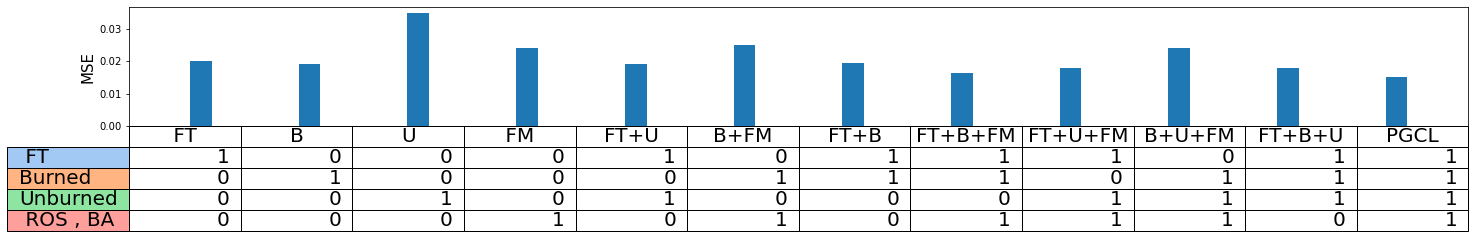

In [9]:

a = [1,0,0,0, 1, 0, 1, 1, 1, 0, 1, 1]
b = [0,1,0,0, 0, 1, 1, 1, 0, 1, 1, 1]
c = [0,0,1,0, 1, 0, 0, 0, 1, 1, 1, 1]
d = [0,0,0,1, 0, 1, 0, 1, 1, 1, 0, 1]
act = [0.0387, 0.004, 0.0164, 0.0097]
mse_vals = [0.020,0.019,0.035,0.024,0.0192, 0.025, 0.0195, 0.0165, 0.018, 0.024, 0.018, 0.015]
bar_width = 0.20
data = [a,b,c,d]

colors = sns.color_palette(palette='pastel')
columns = (' FT ', 'B', 'U', ' FM ', 'FT+U', 'B+FM', 'FT+B', 'FT+B+FM', 'FT+U+FM','B+U+FM', 'FT+B+U', 'PGCL')
print([len(i) for i in data], len(columns))
index = np.arange(len(columns))
fig, axes = plt.subplots(figsize=(24,5), nrows=1)
axes.bar(index, mse_vals, bar_width)

axes.set_xticks([])
axes.set_ylabel('MSE', fontsize=15)
# axes.set_yticklabels(np.round(np.arange(0.000,0.035, 0.005),3), fontsize=15)
the_table=axes.table(cellText=data,
          rowLabels=[' FT ', 'Burned', 'Unburned', ' ROS , BA '],
          rowColours=colors,
          colLabels=columns,
#                     colWidths=[0.08 for x in columns]
                    )

the_table.auto_set_font_size(False)
the_table.set_fontsize(20)
the_table.scale(1, 4)
# the_table.auto_set_column_width(col=list(range(1)))
axes.set_xticks([])
fig.subplots_adjust(bottom=0.55)
# plt.tight_layout()
plt.savefig('icdm/ablation.png', dpi=500)
# plt.title('Some title')
plt.show()